In [3]:
import pandas as pd
#import fiona
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point
#import shapely
import math
import os
from collections import OrderedDict
from EM_Tomo_viz_tools import *
from Create_vector_grid import *
%matplotlib inline
pd.options.mode.chained_assignment = None


In [4]:
#Settings:
#check for 3D data only, 2D cannot be worked on
#change to height at -3
#add crs to grid_data and output
#throw out all no-data rows
#Multiple depths
height = -3
no_data_value = float('Nan')

input_file2 = "/Users/kazv/VanBovenDrive/VanBoven MT/500 Projects/P2 Wiertsema/data/3D_SHP/test_inversion2qgis.shp"
output_file2 = "/Users/kazv/VanBovenDrive/VanBoven MT/500 Projects/P2 Wiertsema/data/Test_output.shp"


In [11]:
#Read and upgrade basic GDF:
gdf = read_shapefile(input_file2)
gdf['top'] = gdf.elev_boven
gdf['bottom'] = gdf.elev_boven+gdf.Dikte


In [6]:
gdf

Punt_ID          X          Y  Topo  elev_onder      EC  \
0         Meetlocatie_1  589073.31  5740207.0  0.88        0.58   46.98   
1         Meetlocatie_2  589088.13  5740207.0  0.88        0.58   51.23   
2         Meetlocatie_3  589102.88  5740207.0  0.89        0.59   50.94   
3         Meetlocatie_4  589117.63  5740207.0  0.89        0.59   51.60   
4         Meetlocatie_5  589132.38  5740207.0  0.89        0.59   52.08   
5         Meetlocatie_6  589147.19  5740207.0  0.89        0.59   52.38   
6         Meetlocatie_7  589162.00  5740207.0  0.89        0.59   54.91   
7         Meetlocatie_8  589176.81  5740207.0  0.89        0.59   50.06   
8         Meetlocatie_9  589073.31  5740222.0  0.88        0.58   50.82   
9        Meetlocatie_10  589088.13  5740222.0  0.88        0.58   48.22   
10       Meetlocatie_11  589102.88  5740222.0  0.88        0.58   47.30   
11       Meetlocatie_12  589117.63  5740222.0  0.88        0.58   46.31   
12       Meetlocatie_13  589132.38  5740222.0  0.88        0.58   45.66   
13       Meetlocatie_14  589147.19  5740222.0  0.88        0.58   45.54   
14       Meetlocatie_15  589162.00  5740222.0  0.88        0.58   47.90   
15       Meetlocatie_16  589176.81  5740222.0  0.88        0.58   51.21   
16       Meetlocatie_17  589191.63  5740222.0  0.88        0.58   56.54   
17       Meetlocatie_18  589206.31  5740222.0  0.87        0.57   60.45   
18       Meetlocatie_19  589221.13  5740222.0  0.87        0.57   69.64   
19       Meetlocatie_20  589235.88  5740222.0  0.87        0.57   69.49   
20       Meetlocatie_21  589250.69  5740222.0  0.87        0.57   71.10   
21       Meetlocatie_22  589265.38  5740222.0  0.87        0.57   73.36   
22       Meetlocatie_23  589280.31  5740222.0  0.87        0.57   76.98   
23       Meetlocatie_24  589295.00  5740222.0  0.87        0.57   89.03   
24       Meetlocatie_25  589309.81  5740222.0  0.87        0.57   95.46   
25       Meetlocatie_26  589324.63  5740222.0  0.87        0.57  111.03   
26       Meetlocatie_27  589339.38  5740222.0  0.87        0.57   81.78   
27       Meetlocatie_28  589354.13  5740222.0  0.87        0.57  113.39   
28       Meetlocatie_29  589073.31  5740237.0  0.88        0.58   50.76   
29       Meetlocatie_30  589088.13  5740237.0  0.88        0.58   47.19   
...                 ...        ...        ...   ...         ...     ...   
10162  Meetlocatie_1245  589945.38  5740748.0  1.76       -3.94  212.50   
10163  Meetlocatie_1246  589960.19  5740748.0  1.76       -3.94  208.56   
10164  Meetlocatie_1247  589974.88  5740748.0  1.77       -3.93  203.19   
10165  Meetlocatie_1248  589989.81  5740748.0  1.76       -3.94  207.45   
10166  Meetlocatie_1249  590004.50  5740748.0  1.77       -3.93  204.06   
10167  Meetlocatie_1250  590019.31  5740748.0  1.75       -3.95  207.88   
10168  Meetlocatie_1251  590034.13  5740748.0  1.79       -3.91  206.47   
10169  Meetlocatie_1252  590048.88  5740748.0  1.74       -3.96  204.53   
10170  Meetlocatie_1253  590063.63  5740748.0  1.77       -3.93  207.55   
10171  Meetlocatie_1254  590078.38  5740748.0  1.74       -3.96  209.63   
10172  Meetlocatie_1255  590093.19  5740748.0  1.84       -3.86  216.79   
10173  Meetlocatie_1256  590108.00  5740748.0  1.64       -4.06  210.51   
10174  Meetlocatie_1257  590122.81  5740748.0  1.84       -3.86  231.33   
10175  Meetlocatie_1258  589856.69  5740763.0  0.06       -5.64  217.70   
10176  Meetlocatie_1259  589871.50  5740763.0 -0.07       -5.77  230.27   
10177  Meetlocatie_1260  589886.31  5740763.0  0.04       -5.66  227.35   
10178  Meetlocatie_1261  589901.13  5740763.0  0.14       -5.56  239.72   
10179  Meetlocatie_1262  589915.81  5740763.0  0.31       -5.39  235.96   
10180  Meetlocatie_1263  589930.63  5740763.0  0.43       -5.27  230.55   
10181  Meetlocatie_1264  589945.38  5740763.0  0.69       -5.01  227.72   
10182  Meetlocatie_1265  589960.19  5740763.0  1.01       -4.69  226.09   
10183  Meetlocatie_1266  589974.88  57407

In [43]:
# if not(isinstance(filetext, str)) || not(isinstance(output_foldertext, str)):
    
    
    
filetext = ''
output_foldertext = 2

if not(isinstance(filetext,str)) or not(isinstance(output_foldertext,str)):
    print('yes')
else:
    print('no')

yes


In [14]:
gdf_filtered = gdf[(gdf.top> height) & (gdf.bottom <= height)]
gdf_filtered

Empty GeoDataFrame
Columns: [Punt_ID, X, Y, Topo, elev_onder, EC, Dikte, elev_boven, ID, geometry, top, bottom]
Index: []

In [12]:
#Filter for the right depth and create new GDF with 'Meetlocatie' ID as index
gdf_filtered = gdf[(gdf.top> height) & (gdf.bottom <= height)]
gdf_filtered['Punt_ID_num'] = gdf_filtered.Punt_ID.apply(lambda x: int(x[x.find('_')+1::]))
gdf_filtered.sort_values('Punt_ID_num', inplace=True)
gdf_filtered.set_index('Punt_ID_num', drop=True, inplace=True)
gdf_filtered.drop('Punt_ID',1,inplace=True)

#Determine grid size by using distance between measurements
gdf_filtered['dist_to_next'] = gdf_filtered.distance(gdf_filtered.shift(1))
grid_size = int(gdf_filtered.dist_to_next.median())+1 #+1 to make sure we slightly over-sample

ValueError: cannot convert float NaN to integer

In [44]:
#Create the grid
xmin,ymin,xmax,ymax = gdf_filtered.geometry.total_bounds

length = grid_size
wide = grid_size

cols = list(range(int(np.floor(xmin)-wide), int(np.ceil(xmax)+wide), wide))
rows = list(range(int(np.floor(ymin)-length), int(np.ceil(ymax)+length), length))
rows.reverse()

polygons = []
for x in cols:
    for y in rows:
        polygons.append( Polygon([(x,y), (x+wide, y), (x+wide, y-length), (x, y-length)]) )

grid = gpd.GeoDataFrame({'geometry':polygons})
grid.crs = gdf_filtered.crs
#translate grid so that points fall in the center instead of at the boundaries
grid.geometry = grid.geometry.translate(xoff=int(grid_size/2), yoff=int(grid_size/2))

NameError: name 'gdf_filtered' is not defined

In [23]:
#Join raster with measurement points to find out which points lie in every raster element
joined_raster_data = gpd.sjoin(grid,gdf_filtered, how="left")

In [24]:
grid_data = gpd.GeoDataFrame()
grid_data['geometry'] = grid.geometry
grid_data['IDs'] = joined_raster_data.groupby(joined_raster_data.index).index_right.apply(list)
grid_data['has_data'] = grid_data.IDs.apply(lambda x: x[0] == x[0])
grid_data['EC'] = no_data_value
grid_data['height'] = height
grid_data.crs = gdf_filtered.crs


In [25]:
#Determine right 'average' EC value, based on proximity to centroid.
#This could be extended to include empty as well by interpolation.
#TODO: Add concave hull boundary to detect which 'novalues' should remain 'novalue' and interpolate the others.
for ii in range(1,len(grid_data)):
    line = grid_data.iloc[ii]
    if line.has_data:
        id_list = line.IDs
        #Get all measurements within the square
        this_square_df =gdf_filtered[gdf_filtered.index.isin(id_list)]
        centroid = line.geometry.centroid
        #Determine distance (and inverse) to centroid
        this_square_df['dist_to_centroid'] = this_square_df.geometry.distance(centroid)
        this_square_df['closeness'] = 1/this_square_df.dist_to_centroid
        #take weighted average of EC with respect to closeness to centroid. 
        #The closer the higher its weighted in a linear fashion.
        this_square_df['weighted_EC'] = this_square_df.EC * this_square_df.closeness
        weighted_avg_EC = this_square_df.weighted_EC.sum()/this_square_df.closeness.sum()
        grid_data['EC'][grid_data.index==ii] = weighted_avg_EC


In [26]:
#generate requested output
#add EPSG 28992
output = grid_data[['geometry','EC','height']][grid_data.has_data]
output.crs = gdf_filtered.crs
output.to_file(driver = 'ESRI Shapefile', filename = output_file2)

/Users/kazv/miniconda3/envs/wiertsema/lib/python3.7/site-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


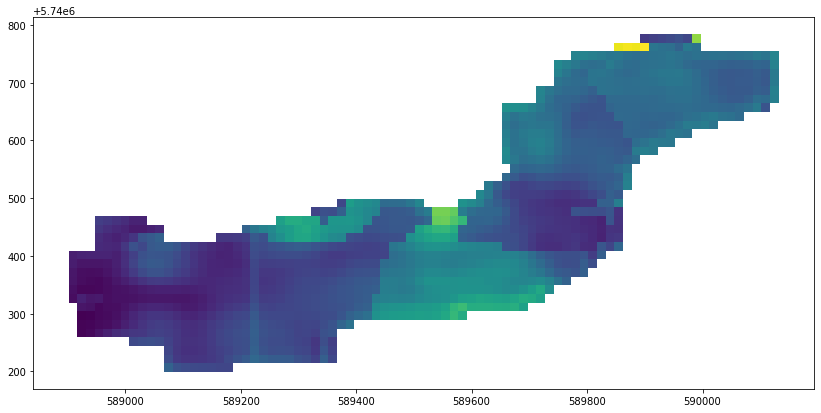

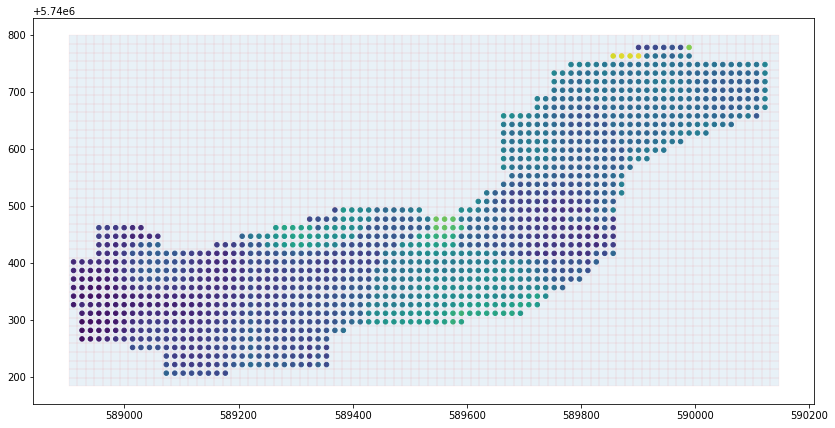

In [27]:
#Optional plotting for reference
grid_data[grid_data.EC>0].plot(column = 'EC', figsize=(14,10))
data_plot = gdf_filtered.plot(column='EC', markersize=20, figsize=(14,10))
grid.plot(ax=data_plot,alpha=0.1, edgecolor="red", linewidth=0.4)

In [26]:
output

geometry      EC  depth
0     POLYGON ((588902 5740799, 588917 5740799, 5889...     NaN      3
1     POLYGON ((588902 5740784, 588917 5740784, 5889...     NaN      3
2     POLYGON ((588902 5740769, 588917 5740769, 5889...     NaN      3
3     POLYGON ((588902 5740754, 588917 5740754, 5889...     NaN      3
4     POLYGON ((588902 5740739, 588917 5740739, 5889...     NaN      3
5     POLYGON ((588902 5740724, 588917 5740724, 5889...     NaN      3
6     POLYGON ((588902 5740709, 588917 5740709, 5889...     NaN      3
7     POLYGON ((588902 5740694, 588917 5740694, 5889...     NaN      3
8     POLYGON ((588902 5740679, 588917 5740679, 5889...     NaN      3
9     POLYGON ((588902 5740664, 588917 5740664, 5889...     NaN      3
10    POLYGON ((588902 5740649, 588917 5740649, 5889...     NaN      3
11    POLYGON ((588902 5740634, 588917 5740634, 5889...     NaN      3
12    POLYGON ((588902 5740619, 588917 5740619, 5889...     NaN      3
13    POLYGON ((588902 5740604, 588917 5740604, 5889...     NaN      3
14    POLYGON ((588902 5740589, 588917 5740589, 5889...     NaN      3
15    POLYGON ((588902 5740574, 588917 5740574, 5889...     NaN      3
16    POLYGON ((588902 5740559, 588917 5740559, 5889...     NaN      3
17    POLYGON ((588902 5740544, 588917 5740544, 5889...     NaN      3
18    POLYGON ((588902 5740529, 588917 5740529, 5889...     NaN      3
19    POLYGON ((588902 5740514, 588917 5740514, 5889...     NaN      3
20    POLYGON ((588902 5740499, 588917 5740499, 5889...     NaN      3
21    POLYGON ((588902 5740484, 588917 5740484, 5889...     NaN      3
22    POLYGON ((588902 5740469, 588917 5740469, 5889...     NaN      3
23    POLYGON ((588902 5740454, 588917 5740454, 5889...     NaN      3
24    POLYGON ((588902 5740439, 588917 5740439, 5889...     NaN      3
25    POLYGON ((588902 5740424, 588917 5740424, 5889...     NaN      3
26    POLYGON ((588902 5740409, 588917 5740409, 5889...  122.39      3
27    POLYGON ((588902 5740394, 588917 5740394, 5889...  121.48      3
28    POLYGON ((588902 5740379, 588917 5740379, 5889...  115.71      3
29    POLYGON ((588902 5740364, 588917 5740364, 5889...  114.18      3
...                                                 ...     ...    ...
3373  POLYGON ((590132 5740634, 590147 5740634, 5901...     NaN      3
3374  POLYGON ((590132 5740619, 590147 5740619, 5901...     NaN      3
3375  POLYGON ((590132 5740604, 590147 5740604, 5901...     NaN      3
3376  POLYGON ((590132 5740589, 590147 5740589, 5901...     NaN      3
3377  POLYGON ((590132 5740574, 590147 5740574, 5901...     NaN      3
3378  POLYGON ((590132 5740559, 590147 5740559, 5901...     NaN      3
3379  POLYGON ((590132 5740544, 590147 5740544, 5901...     NaN      3
3380  POLYGON ((590132 5740529, 590147 5740529, 5901...     NaN      3
3381  POLYGON ((590132 5740514, 590147 5740514, 5901...     NaN      3
3382  POLYGON ((590132 5740499, 590147 5740499, 5901...     NaN      3
3383  POLYGON ((590132 5740484, 590147 5740484, 5901...     NaN      3
3384  POLYGON ((590132 5740469, 590147 5740469, 5901...     NaN      3
3385  POLYGON ((590132 5740454, 590147 5740454, 5901...     NaN      3
3386  POLYGON ((590132 5740439, 590147 5740439, 5901...     NaN      3
3387  POLYGON ((590132 5740424, 590147 5740424, 5901...     NaN      3
3388  POLYGON ((590132 5740409, 590147 5740409, 5901...     NaN      3
3389  POLYGON ((590132 5740394, 590147 5740394, 5901...     NaN      3
3390  POLYGON ((590132 5740379, 590147 5740379, 5901...     NaN      3
3391  POLYGON ((590132 5740364, 590147 5740364, 5901...     NaN      3
3392  POLYGON ((590132 5740349, 590147 5740349, 5901...     NaN      3
3393  POLYGON ((590132 5740334, 590147 5740334, 5901...     NaN      3
3394  POLYGON ((590132 5740319, 590147 5740319, 5901...     NaN      3
3395  POLYGON ((590132 5740304, 590147 5740304, 5901...     NaN      3
3396  POLYGON ((590132 5740289, 590147 5740289, 5901...     NaN      3
3397  POLYGON ((590132 5740274, 590147 5740274, 5901...     NaN      3


In [28]:
grid_data[grid_data.has_data]

geometry       IDs  has_data  \
26    POLYGON ((588902 5740409, 588917 5740409, 5889...   [529.0]      True   
27    POLYGON ((588902 5740394, 588917 5740394, 5889...   [467.0]      True   
28    POLYGON ((588902 5740379, 588917 5740379, 5889...   [406.0]      True   
29    POLYGON ((588902 5740364, 588917 5740364, 5889...   [347.0]      True   
30    POLYGON ((588902 5740349, 588917 5740349, 5889...   [290.0]      True   
31    POLYGON ((588902 5740334, 588917 5740334, 5889...   [234.0]      True   
67    POLYGON ((588917 5740409, 588932 5740409, 5889...   [530.0]      True   
68    POLYGON ((588917 5740394, 588932 5740394, 5889...   [468.0]      True   
69    POLYGON ((588917 5740379, 588932 5740379, 5889...   [407.0]      True   
70    POLYGON ((588917 5740364, 588932 5740364, 5889...   [348.0]      True   
71    POLYGON ((588917 5740349, 588932 5740349, 5889...   [291.0]      True   
72    POLYGON ((588917 5740334, 588932 5740334, 5889...   [235.0]      True   
73    POLYGON ((588917 5740319, 588932 5740319, 5889...   [181.0]      True   
74    POLYGON ((588917 5740304, 588932 5740304, 5889...   [135.0]      True   
75    POLYGON ((588917 5740289, 588932 5740289, 5889...   [103.0]      True   
76    POLYGON ((588917 5740274, 588932 5740274, 5889...    [73.0]      True   
108   POLYGON ((588932 5740409, 588947 5740409, 5889...   [531.0]      True   
109   POLYGON ((588932 5740394, 588947 5740394, 5889...   [469.0]      True   
110   POLYGON ((588932 5740379, 588947 5740379, 5889...   [408.0]      True   
111   POLYGON ((588932 5740364, 588947 5740364, 5889...   [349.0]      True   
112   POLYGON ((588932 5740349, 588947 5740349, 5889...   [292.0]      True   
113   POLYGON ((588932 5740334, 588947 5740334, 5889...   [236.0]      True   
114   POLYGON ((588932 5740319, 588947 5740319, 5889...   [182.0]      True   
115   POLYGON ((588932 5740304, 588947 5740304, 5889...   [136.0]      True   
116   POLYGON ((588932 5740289, 588947 5740289, 5889...   [104.0]      True   
117   POLYGON ((588932 5740274, 588947 5740274, 5889...    [74.0]      True   
145   POLYGON ((588947 5740469, 588962 5740469, 5889...   [763.0]      True   
146   POLYGON ((588947 5740454, 588962 5740454, 5889...   [710.0]      True   
147   POLYGON ((588947 5740439, 588962 5740439, 5889...   [654.0]      True   
148   POLYGON ((588947 5740424, 588962 5740424, 5889...   [592.0]      True   
...                                                 ...       ...       ...   
3165  POLYGON ((590057 5740679, 590072 5740679, 5900...  [1123.0]      True   
3166  POLYGON ((590057 5740664, 590072 5740664, 5900...  [1096.0]      True   
3167  POLYGON ((590057 5740649, 590072 5740649, 5900...  [1068.0]      True   
3201  POLYGON ((590072 5740754, 590087 5740754, 5900...  [1254.0]      True   
3202  POLYGON ((590072 5740739, 590087 5740739, 5900...  [1230.0]      True   
3203  POLYGON ((590072 5740724, 590087 5740724, 5900...  [1204.0]      True   
3204  POLYGON ((590072 5740709, 590087 5740709, 5900...  [1178.0]      True   
3205  POLYGON ((590072 5740694, 590087 5740694, 5900...  [1152.0]      True   
3206  POLYGON ((590072 5740679, 590087 5740679, 5900...  [1124.0]      True   
3207  POLYGON ((590072 5740664, 590087 5740664, 5900...  [1097.0]      True   
3242  POLYGON ((590087 5740754, 590102 5740754, 5901...  [1255.0]      True   
3243  POLYGON ((590087 5740739, 590102 5740739, 5901...  [1231.0]      True   
3244  POLYGON ((590087 5740724, 590102 5740724, 5901...  [1205.0]      True   
3245  POLYGON ((590087 5740709, 590102 5740709, 5901...  [1179.0]      True   
3246  POLYGON ((590087 5740694, 590102 5740694, 5901...  [1153.0]      True   
3247  POLYGON ((590087 5740679, 590102 5740679, 5901...  [1125.0]      True   
3248  POLYGON ((590087 5740664, 590102 5740664, 5901...  [1098.0]      True   
3283  POLYGON ((590102 5740754, 590117 5740754, 5901...  [1256.0]      True   
3284  POLYGON ((590102 5740739, 590117 5740739, 5901...  [1232.0]      True   
3285  POLYGON ((59